# Boosting Methods

Boosting is a Meta-Learning algo that can be applied to all models.

However for purpose of notes we will apply to DT

###  Ada Boosting (Adaptive Boosting)

Uses an ensemble of `weak learners` and then combining them through the use of a weighted sum.

A `weak learner`is a model that is too simple to perform well on its own. (e.g. Stumps - one node and two leaves)

Ada boosting aggregates multiple weak learners allowing the overall ensemble model to learn slowly from features. (trees built slowly).

Ada Boosting takes a weak model, runs it and for every point it misclassifies it adjusts the weights given to each point accorindlgy, this model is then used as the training set for another weak model. this then repeats and aggregates and continues until all WEAK LEARNERS are one. (Meta learning) .

usually error stabilises way before it overfits 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("DATA\mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


AIMS:
   - predict poisonous vs Edible.
   - Create cautionary guidelines for people picking mushrooms. 

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<AxesSubplot:xlabel='class', ylabel='count'>

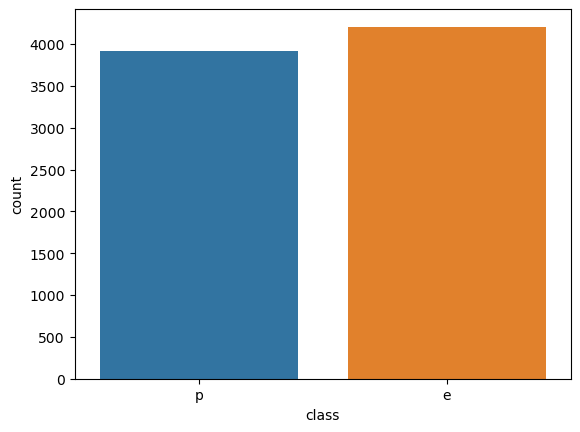

In [7]:
sns.countplot(data=df,x='class') #shows data is somewhat balanced.

In [12]:
uniq_features = df.describe().transpose().reset_index().sort_values('unique')

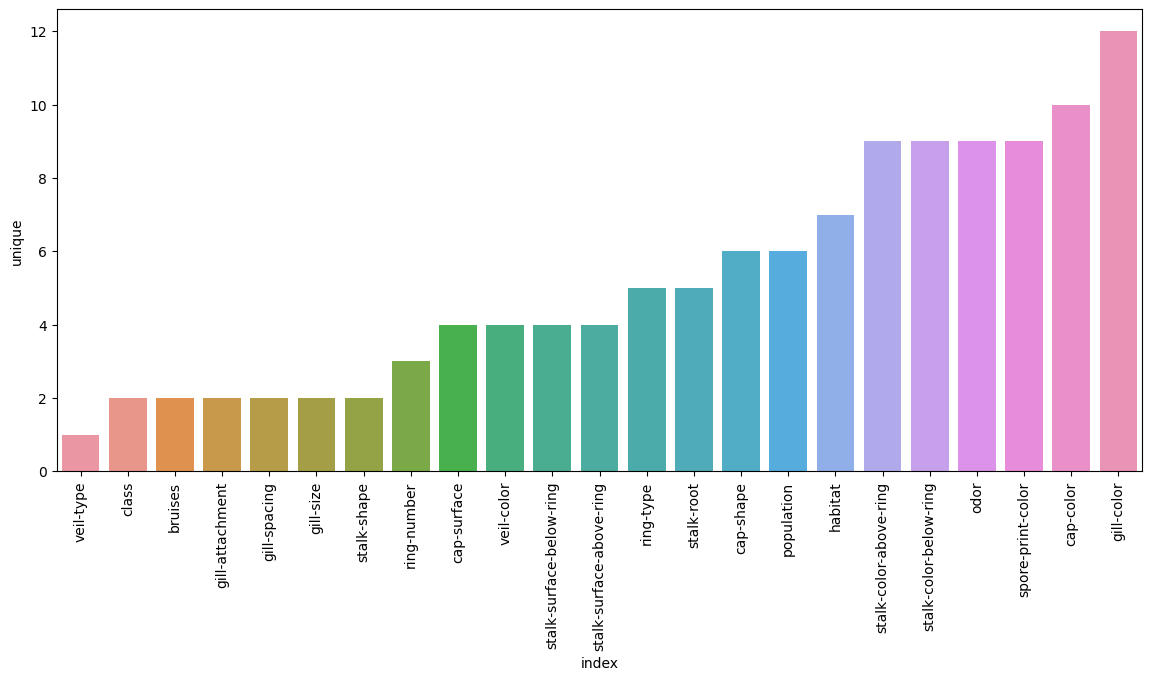

In [15]:
plt.figure(figsize=(14,6))
sns.barplot(data=uniq_features,x='index',y='unique')
plt.xticks(rotation=90);

In [16]:
X = df.drop('class',axis=1)

In [18]:
#X.isnull().sum()

In [19]:
#X data is currently in categorical letters. we need to use dummie variables.
X=pd.get_dummies(X,drop_first=True)

In [20]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [21]:
y=df['class']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101) 
# not bothering with gridsearchcv as just coding to show how main code works

In [24]:
#create model
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model = AdaBoostClassifier(n_estimators=1) #1 to make model choose the single best feature to split on (single stump)

In [27]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [38]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [29]:
predictions = model.predict(X_test)

In [30]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [32]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
model.feature_importances_.argmax()

22

In [34]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

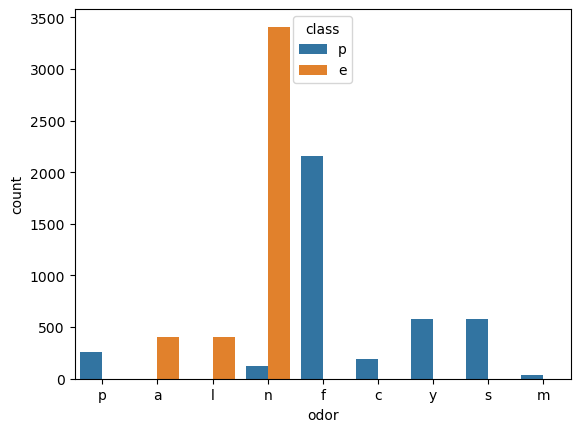

In [36]:
sns.countplot(data=df,x='odor',hue='class')

In [37]:
len(X.columns)

95

In [39]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    
    err = 1-accuracy_score(y_test,predict)
    
    error_rates.append(err)

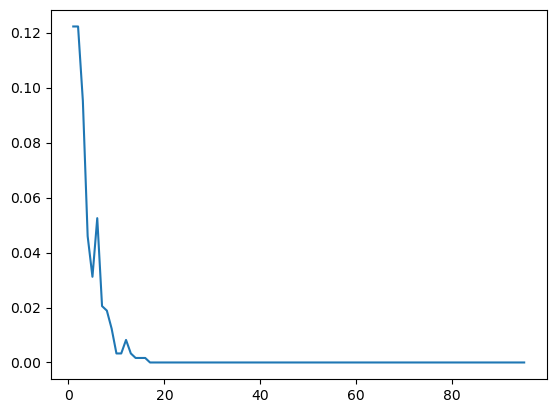

In [40]:
plt.plot(range(1,96),error_rates)

In [52]:
model #graph above ideally should have n 18 ish for better fit

AdaBoostClassifier(n_estimators=95)

In [42]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [43]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [48]:
imp_features = feats[feats['Importance']>0]

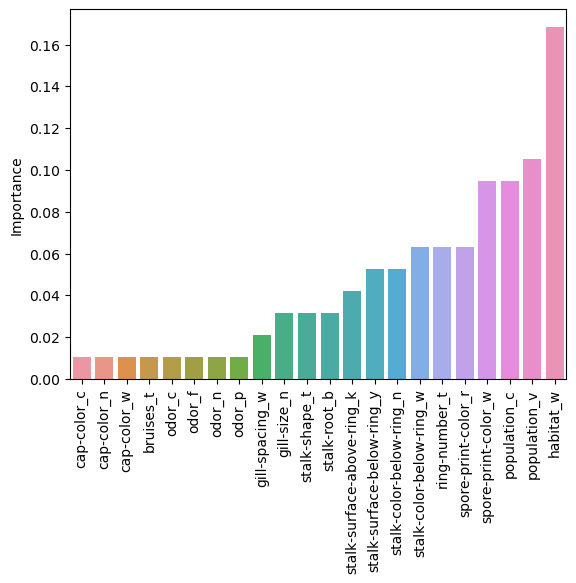

In [51]:
sns.barplot(data=imp_features.sort_values('Importance'),x=imp_features.index,y='Importance')
plt.xticks(rotation=90);

we can see that stumps can be great at displaying critical info that you could push to the public for identifying potentially safe mushrooms to eat. however a larger n value means we have a better model to fit to

# Gradient Boosting

take weak learners created in series in order to produce a strong ensemble model, gradient boosting uses residual error for learning 

### Gradient Boosting vs AdaBoost
    - Larger trees allowed in gradient boosting
    - learning rate coefficient is the same for all weak learners
    - Gradual series learning is based on training on the `residuals` of the previous model
    
residual is true y val minus the predicted.
next model in series tries to predict the error/residual of the previous model. Learning in Series.
Learning from thhe mistakes of previous model.

Subsequent trees aiming to correct for the error in previous trees.

In [53]:
#employ gridsearch

In [55]:
df = pd.read_csv('DATA/mushrooms.csv')

In [56]:
X = df.drop('class',axis=1)

In [57]:
X = pd.get_dummies(X,drop_first=True)

In [58]:
y = df['class']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [64]:
gradient_model = GradientBoostingClassifier()

In [65]:
grid_model = GridSearchCV(gradient_model,param_grid)

In [66]:
grid_model.fit(X_train,y_train)


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [67]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [68]:
predictions = grid_model.predict(X_test)

In [69]:
predictions 

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [70]:
grid_model.best_estimator_

GradientBoostingClassifier(n_estimators=50)

In [71]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [73]:
grid_model.best_estimator_.feature_importances_

array([1.71990251e-04, 3.89117689e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.68661908e-03, 6.41340332e-16, 6.62062337e-16,
       0.00000000e+00, 4.17552494e-17, 1.57695726e-16, 0.00000000e+00,
       6.52598293e-18, 0.00000000e+00, 0.00000000e+00, 7.60672342e-05,
       2.44684069e-03, 5.75765856e-02, 1.30525988e-04, 1.76351744e-02,
       2.07370954e-02, 1.46409063e-04, 6.15607813e-01, 6.24984488e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28292323e-02,
       1.11576647e-02, 0.00000000e+00, 2.06978241e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.82469004e-18,
       0.00000000e+00, 0.00000000e+00, 1.14298935e-17, 0.00000000e+00,
       0.00000000e+00, 7.49783678e-04, 1.28900548e-01, 3.03211335e-03,
       4.74281281e-02, 5.30332175e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.07677982e-03, 1.85959401e-02, 1.37171445e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [74]:
ft_importance = grid_model.best_estimator_.feature_importances_

In [75]:
important_feat = pd.DataFrame(index=X.columns,data=ft_importance,columns=['Importance'])

In [76]:
important_feat

,Importance
cap-shape_c,1.719903e-04
cap-shape_f,3.891177e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,7.992289e-17


In [77]:
important_feat = important_feat[important_feat['Importance']>0.0005]

In [83]:
important_feat = important_feat.sort_values('Importance')

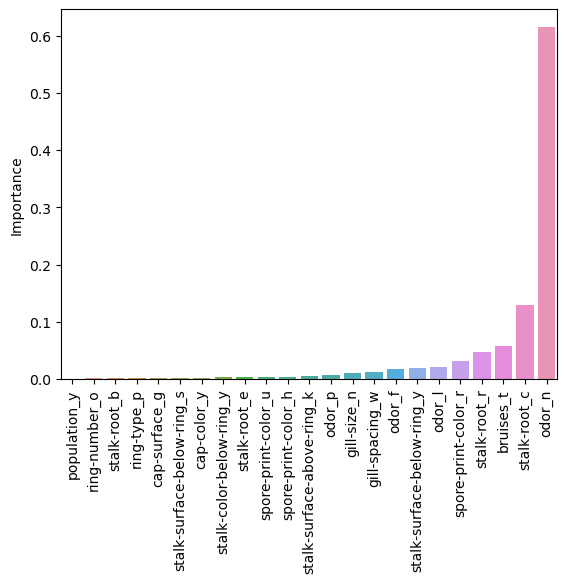

In [84]:
sns.barplot(data=important_feat,
           x=important_feat.index,
           y='Importance')

plt.xticks(rotation=90);